In [1]:
import pandas as pd
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import *
from scipy.spatial.distance import euclidean
from tslearn.clustering import TimeSeriesKMeans 
from tslearn import metrics
import random
from dtw import *
import ruptures as rpt

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
df = pd.read_csv(r'C:\Users\PC\Cookies\Desktop\spinewise_project\spinewise\059-COMBINED-2022-11-9-10-20-34-1667996115-v1.4.3+lucina-buzz.csv')

In [3]:
df.head()

,Unnamed: 0,ts_r,acc_x_r,acc_y_r,acc_z_r,temp_r,gyr_x_r,gyr_y_r,gyr_z_r,mag_x_r,...,temp_n,gyr_x_n,gyr_y_n,gyr_z_n,mag_x_n,mag_y_n,mag_z_n,kal_status_n,alpha_n,beta_n
0,0,1371268.0,0.969238,0.014404,-0.292480,4656.0,-7.263184,1.953125,3.601074,10971.0,...,3776.0,-2.105713,-3.509521,2.746582,4712.0,-5753.0,-10483.0,1250.0,-705.0,1792.0
1,1,1371269.0,0.977783,0.008057,-0.298340,4592.0,-5.126953,1.800537,2.532959,10971.0,...,3776.0,-4.730225,0.335693,2.136230,4712.0,-5753.0,-10483.0,1250.0,-705.0,1792.0
2,2,1371270.0,0.968994,0.005859,-0.298340,4608.0,-3.936768,0.396729,1.373291,10970.0,...,3840.0,-1.770020,1.617432,0.091553,4692.0,-5741.0,-10421.0,1250.0,-705.0,1792.0
3,3,1371271.0,0.955566,0.010498,-0.301270,4672.0,-2.838135,0.762939,0.732422,10970.0,...,3728.0,-1.831055,0.122070,-1.586914,4692.0,-5741.0,-10421.0,1250.0,-705.0,1792.0
4,4,1371272.0,0.978271,0.006348,-0.309814,4752.0,-0.183105,0.885010,-0.610352,10974.0,...,3728.0,0.793457,2.227783,-3.601074,4691.0,-5746.0,-10480.0,1250.0,-705.0,1792.0


In [4]:
df['difference_r'] = df['beta_r'] - df['alpha_r']
df['difference_r']

0          4445.0
1          4445.0
2          4445.0
3          4445.0
4          4445.0
           ...   
154161   -48967.0
154162   -48927.0
154163   -48959.0
154164   -48959.0
154165   -48959.0
Name: difference_r, Length: 154166, dtype: float64

In [5]:
df = df.drop(['alpha_r','beta_r','alpha_n','beta_n','temp_r','ts_n','temp_r','Unnamed: 0','mag_z_n','mag_y_r','mag_y_n','mag_z_r','mag_x_r','kal_status_r','acc_x_n','acc_y_n','acc_z_n','temp_n','gyr_x_n','gyr_y_n','gyr_z_n','mag_x_n','kal_status_n'], axis=1)

In [6]:
df.head()

,ts_r,acc_x_r,acc_y_r,acc_z_r,gyr_x_r,gyr_y_r,gyr_z_r,difference_r
0,1371268.0,0.969238,0.014404,-0.292480,-7.263184,1.953125,3.601074,4445.0
1,1371269.0,0.977783,0.008057,-0.298340,-5.126953,1.800537,2.532959,4445.0
2,1371270.0,0.968994,0.005859,-0.298340,-3.936768,0.396729,1.373291,4445.0
3,1371271.0,0.955566,0.010498,-0.301270,-2.838135,0.762939,0.732422,4445.0
4,1371272.0,0.978271,0.006348,-0.309814,-0.183105,0.885010,-0.610352,4445.0


In [7]:
df.shape

(154166, 8)

In [8]:
df = df.head(5000)

In [9]:
from sklearn.preprocessing import MinMaxScaler


x_calls = df.columns[1:]
scaller = MinMaxScaler()
matrix = pd.DataFrame(scaller.fit_transform(df[x_calls]),columns=x_calls)
matrix['ts'] = df['ts_r']

print(matrix.head())

    acc_x_r   acc_y_r   acc_z_r   gyr_x_r   gyr_y_r   gyr_z_r  difference_r  \
0  0.484382  0.600897  0.426291  0.507063  0.452017  0.572294           1.0   
1  0.488657  0.598053  0.421315  0.512240  0.451204  0.566563           1.0   
2  0.484260  0.597069  0.421315  0.515125  0.443722  0.560341           1.0   
3  0.477543  0.599147  0.418826  0.517787  0.445673  0.556902           1.0   
4  0.488901  0.597288  0.411570  0.524222  0.446324  0.549697           1.0   

          ts  
0  1371268.0  
1  1371269.0  
2  1371270.0  
3  1371271.0  
4  1371272.0  


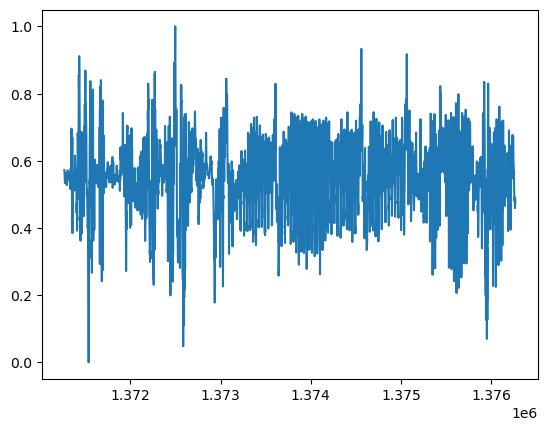

In [10]:
list = matrix.columns.tolist()[1:]
plt.plot(matrix['ts'],matrix[list[4]])


In [11]:
matrix = matrix.rolling(window=5, min_periods=1).mean()
print(matrix)

       acc_x_r   acc_y_r   acc_z_r   gyr_x_r   gyr_y_r   gyr_z_r  \
0     0.484382  0.600897  0.426291  0.507063  0.452017  0.572294   
1     0.486519  0.599475  0.423803  0.509652  0.451610  0.569429   
2     0.485766  0.598673  0.422973  0.511476  0.448981  0.566399   
3     0.483710  0.598791  0.421937  0.513054  0.448154  0.564025   
4     0.484749  0.598491  0.419863  0.515287  0.447788  0.561159   
...        ...       ...       ...       ...       ...       ...   
4995  0.499844  0.530023  0.592619  0.512610  0.378822  0.478926   
4996  0.499624  0.534901  0.580137  0.515036  0.373162  0.474439   
4997  0.499502  0.538313  0.572880  0.519740  0.370690  0.472114   
4998  0.497450  0.544591  0.565706  0.523304  0.369486  0.468675   
4999  0.494739  0.552663  0.561808  0.530434  0.367111  0.469723   

      difference_r         ts  
0         1.000000  1371268.0  
1         1.000000  1371268.5  
2         1.000000  1371269.0  
3         1.000000  1371269.5  
4         1.000000  137

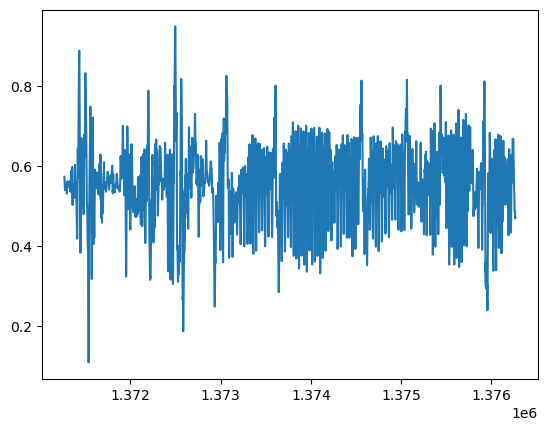

In [12]:
list = matrix.columns.tolist()[1:]
plt.plot(matrix['ts'],matrix[list[4]])


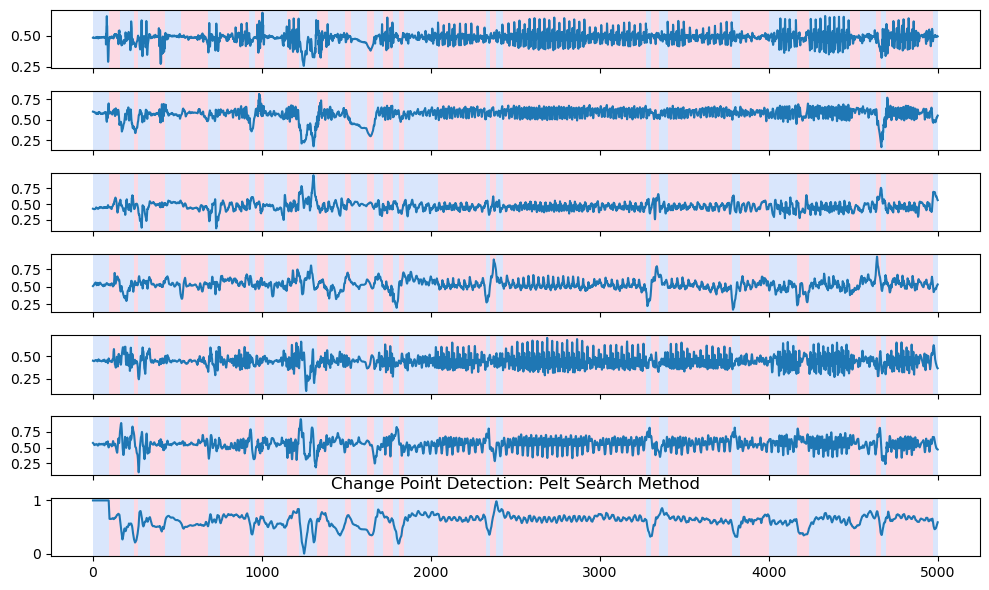

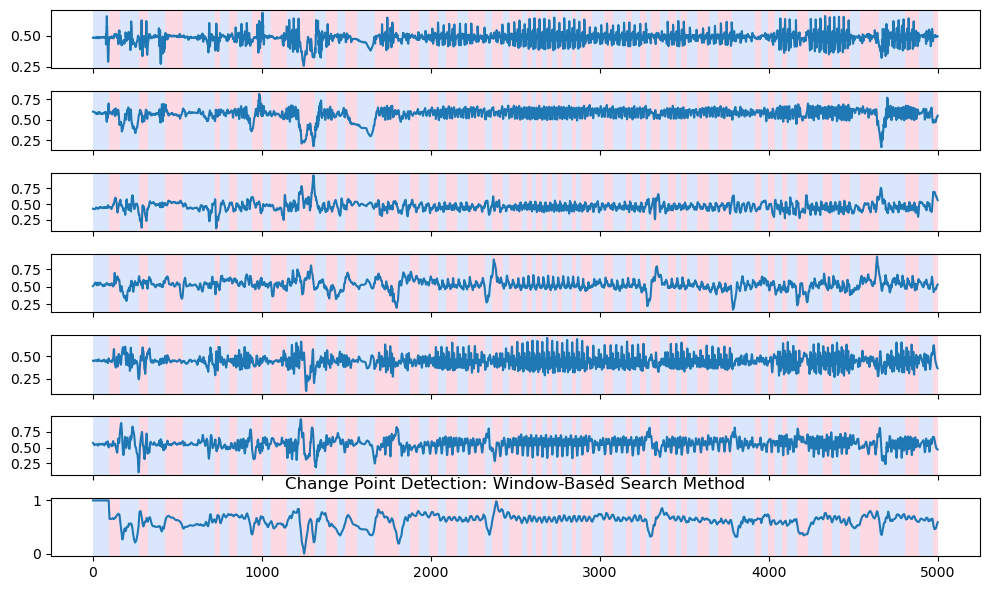

'#Changepoint detection with dynamic programming search method\nmodel = "l1"  \nalgo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)\nmy_bkps = algo.predict(n_bkps=20)\nrpt.show.display(points, my_bkps, figsize=(10, 6))\nplt.title(\'Change Point Detection: Dynamic Programming Search Method\')\nplt.show()'

In [13]:
df.reset_index(level=0, inplace=True)
#Rename the columns for easier analysis
"""df.rename(columns={'index':'ts_r',
            df.columns[1]:'acc_x_r'}, 
            inplace=True)"""
#Format the 'ts_r' column 
matrix['ts']=matrix['ts'].astype(str).str[:-3]

#Convert the time series values to a numpy 1D array
points=np.array(matrix[x_calls])
    
#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 
    
"""#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()"""
    
#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
my_bkps = algo.predict(n_bkps=100)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()
    
"""#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
my_bkps = algo.predict(n_bkps=20)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()"""

In [14]:
"""df_result = pd.DataFrame(my_bkps, columns = ['seg'])
df_result.head()
df_result.shape"""

"df_result = pd.DataFrame(my_bkps, columns = ['seg'])\ndf_result.head()\ndf_result.shape"

In [15]:
change_points = []
startpoint=[]
endpoint= []

In [16]:
startpoint.append(0 )
for r in my_bkps:
        change_points.append(r)
        
for i in range(0,len(change_points)-1,1):
    endpoint.append( change_points[i] )
    startpoint.append( change_points[i] )
endpoint.append(change_points[len(change_points)-1]  )
print (f'{len(change_points)} frames detected')

80 frames detected


In [17]:
print(change_points)

[95, 160, 270, 325, 425, 535, 725, 755, 805, 850, 940, 1005, 1055, 1150, 1225, 1315, 1380, 1445, 1490, 1565, 1670, 1810, 1875, 1930, 1990, 2045, 2090, 2155, 2220, 2320, 2360, 2425, 2465, 2540, 2570, 2600, 2625, 2655, 2685, 2715, 2745, 2775, 2835, 2860, 2890, 2955, 3025, 3080, 3155, 3190, 3240, 3275, 3305, 3355, 3405, 3450, 3480, 3515, 3575, 3645, 3700, 3780, 3920, 3955, 3995, 4035, 4080, 4110, 4165, 4235, 4320, 4375, 4420, 4480, 4540, 4655, 4805, 4890, 4970, 5000]


In [18]:
endpoint

[95,
 160,
 270,
 325,
 425,
 535,
 725,
 755,
 805,
 850,
 940,
 1005,
 1055,
 1150,
 1225,
 1315,
 1380,
 1445,
 1490,
 1565,
 1670,
 1810,
 1875,
 1930,
 1990,
 2045,
 2090,
 2155,
 2220,
 2320,
 2360,
 2425,
 2465,
 2540,
 2570,
 2600,
 2625,
 2655,
 2685,
 2715,
 2745,
 2775,
 2835,
 2860,
 2890,
 2955,
 3025,
 3080,
 3155,
 3190,
 3240,
 3275,
 3305,
 3355,
 3405,
 3450,
 3480,
 3515,
 3575,
 3645,
 3700,
 3780,
 3920,
 3955,
 3995,
 4035,
 4080,
 4110,
 4165,
 4235,
 4320,
 4375,
 4420,
 4480,
 4540,
 4655,
 4805,
 4890,
 4970,
 5000]

In [19]:
startpoint

[0,
 95,
 160,
 270,
 325,
 425,
 535,
 725,
 755,
 805,
 850,
 940,
 1005,
 1055,
 1150,
 1225,
 1315,
 1380,
 1445,
 1490,
 1565,
 1670,
 1810,
 1875,
 1930,
 1990,
 2045,
 2090,
 2155,
 2220,
 2320,
 2360,
 2425,
 2465,
 2540,
 2570,
 2600,
 2625,
 2655,
 2685,
 2715,
 2745,
 2775,
 2835,
 2860,
 2890,
 2955,
 3025,
 3080,
 3155,
 3190,
 3240,
 3275,
 3305,
 3355,
 3405,
 3450,
 3480,
 3515,
 3575,
 3645,
 3700,
 3780,
 3920,
 3955,
 3995,
 4035,
 4080,
 4110,
 4165,
 4235,
 4320,
 4375,
 4420,
 4480,
 4540,
 4655,
 4805,
 4890,
 4970]

In [25]:
from sklearn.cluster import DBSCAN
import numpy as np

# Assume time_series is a list or an array of the time series data
# and segment_start and segment_end are the start and end indices of the segment to be clustered
segment = matrix[startpoint[0]:endpoint[0]]

# Fit the DBSCAN model to the segment of the time series
dbscan1 = DBSCAN(eps = 0.5, min_samples = 10).fit(segment)

# Get the cluster labels for each data point in the segment
labels = dbscan1.labels_

In [26]:
labels

array([-1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8, -1], dtype=int64)